In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from scipy.linalg import solve

In [34]:
# Modified Crank-Nicholson scheme



def central_diff(m):
    
    """ This function takes the number of gridpoints in the x-direction as input,
    and returns a second order central difference matrix with respect to the 
    boundary conditions """
    
    
    d = np.eye(m, k=-1) - 2*np.eye(m, k=0) + np.eye(m, k=1)
    
    # Add Neumann boundary conditions dU/dx=0
    d[0, :2] = [-2, 2]
    d[-1, -2:] = [2, -2]
    
    return d
    

    
def f(U_i):
    return np.sin(U_i) - U_i/10
    
    

def crank_nicholsen_x(U_0, h, k, mu, n=0, m=0):
    
    """ Solve reaction diffusion equations (u_t = mu * u_xx + f(u)).
    Remember to modify the function f and the boundary conditions in function central_diff"""
    
    
    r = mu*k/(h**2)
    
    
    # Define matrices for implicit step
    A = np.eye(m) - (r/2)*central_diff(m)
    C = np.eye(m) + (r/2)*central_diff(m)

    
    # Initialize solution matrix
    U = np.zeros((n, m))
    print(U.shape)
    
    
    # Initialize start distributions
    U[0, :] = U_0
    
    
    # Solve iteratively
    for i in range(1, n):
        
        # Define b-vector for implicit step
        b = C.dot(U[i-1, :]) + k*f(U[i-1, :])
        
        # Solve implicit steps
        U_star = solve(A, b)
        
        # Solve explicit time steps
        U[i, :] = U_star + (k/2) * (f(U_star)-f(U[i-1, :]))
        
    return U

### Hyperparameters

In [35]:
# -*- PARAMETERS -*-


n = 400      # Number of timesteps 
m = 100      # Number of x-steps

k = 0.05     # Stepsize in t
h = 0.50     # Stepsize in x

mu = 1.5

# Initial distributions
U_0 = np.arange(m)

In [36]:
U = crank_nicholsen_x(U_0, h, k, mu, n=n, m=m)

(400, 100)


### Plot Solutions

Text(0, 0.5, 'time')

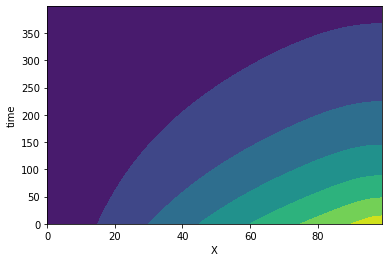

In [38]:
plt.contourf(U)
plt.xlabel("X")
plt.ylabel("time")